In [1]:
import torch
import os
import sys
sys.path.insert(0, os.path.abspath('../../'))
from DNN_module import Net
import matplotlib.pyplot as plt
import numpy as np
import random
import torch

import yfinance as yf

# CPU
torch.set_default_device("cpu")

%run ../../NCoinDP_functions.ipynb

[*********************100%%**********************]  1 of 1 completed


6037

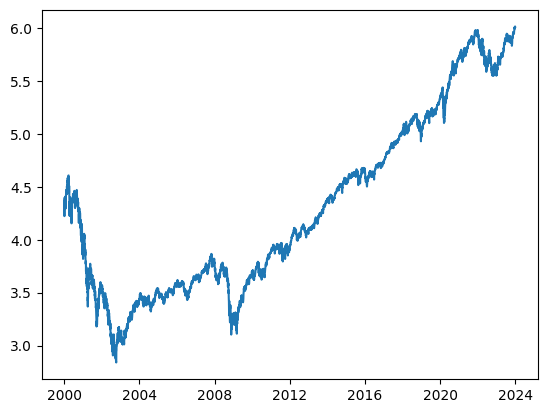

In [2]:
data0 = yf.download("qqq", start="2000-01-01", end="2023-12-31")
data0 = np.log(data0["Adj Close"]) 
plt.plot(data0)
len(data0)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


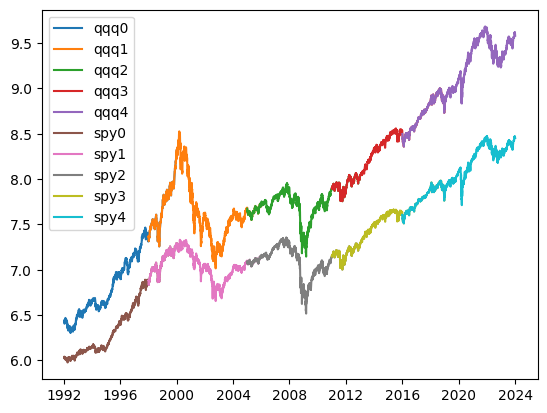

In [3]:
data0_qqq = yf.download("^IXIC", start="1992-01-12", end="2000-01-01")["Adj Close"] # 9-11 at 2001, dotcome bubble 2000-2002
data1_qqq = yf.download("^IXIC", start="1998-01-01", end="2006-01-06")["Adj Close"] # dotcome bubble 2000-2002
data2_qqq = yf.download("^IXIC", start="2005-01-01", end="2013-01-04")["Adj Close"] # financial crisis at 2007-2008
data3_qqq = yf.download("^IXIC", start="2011-01-01", end="2019-01-05")["Adj Close"] # nothing
data4_qqq = yf.download("^IXIC", start="2016-01-01", end="2024-01-05")["Adj Close"] # covid-19 recession at 2020

data0_spy = yf.download("^GSPC", start="1992-01-12", end="2000-01-01")["Adj Close"] # 9-11 at 2001, dotcome bubble 2000-2002
data1_spy = yf.download("^GSPC", start="1998-01-01", end="2006-01-06")["Adj Close"] # 
data2_spy = yf.download("^GSPC", start="2005-01-01", end="2013-01-04")["Adj Close"] # 
data3_spy = yf.download("^GSPC", start="2011-01-01", end="2019-01-05")["Adj Close"] # financial crisis at 2007-2008
data4_spy = yf.download("^GSPC", start="2016-01-01", end="2024-01-05")["Adj Close"] # 

# Using the Adj Close prices for our dataset
plt.plot(np.log(data0_qqq));  data0_qqq = np.log(data0_qqq.values/data0_qqq.values[0])
plt.plot(np.log(data1_qqq));  data1_qqq = np.log(data1_qqq.values/data1_qqq.values[0])
plt.plot(np.log(data2_qqq));  data2_qqq = np.log(data2_qqq.values/data2_qqq.values[0])
plt.plot(np.log(data3_qqq));  data3_qqq = np.log(data3_qqq.values/data3_qqq.values[0])
plt.plot(np.log(data4_qqq));  data4_qqq = np.log(data4_qqq.values/data4_qqq.values[0])

# Using the Adj Close prices for our dataset
plt.plot(np.log(data0_spy));  data0_spy = np.log(data0_spy.values/data0_spy.values[0])
plt.plot(np.log(data1_spy));  data1_spy = np.log(data1_spy.values/data1_spy.values[0])
plt.plot(np.log(data2_spy));  data2_spy = np.log(data2_spy.values/data2_spy.values[0])
plt.plot(np.log(data3_spy));  data3_spy = np.log(data3_spy.values/data3_spy.values[0])
plt.plot(np.log(data4_spy));  data4_spy = np.log(data4_spy.values/data4_spy.values[0])

plt.legend(['qqq0', 'qqq1', 'qqq2', 'qqq3', 'qqq4', 
            'spy0','spy1','spy2','spy3','spy4'],  loc = "best")

In [7]:
data_list_qqq = [data0_qqq, data1_qqq, data2_qqq, data3_qqq, data4_qqq]
data_list_spy = [data0_spy, data1_spy, data2_spy, data3_spy, data4_spy]

for i in range(len(data_list_qqq)):
    print(i, len(data_list_qqq[i]))
print("===========================")
for i in range(len(data_list_spy)):
    print(i, len(data_list_spy[i]))

0 2015
1 2015
2 2015
3 2015
4 2015
0 2015
1 2015
2 2015
3 2015
4 2015


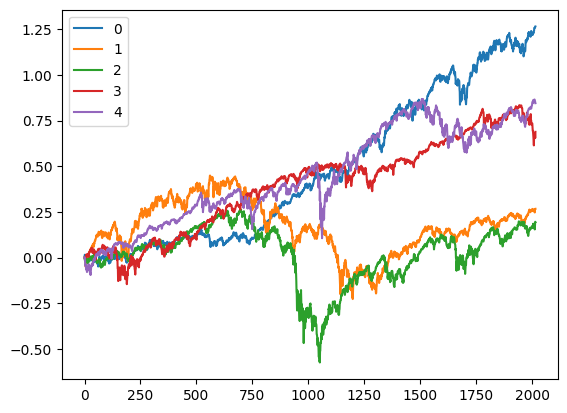

In [15]:
for i in range(len(data_list_spy)):
    plt.plot(data_list_spy[i])   
plt.legend(["0", "1", "2", "3", "4"])

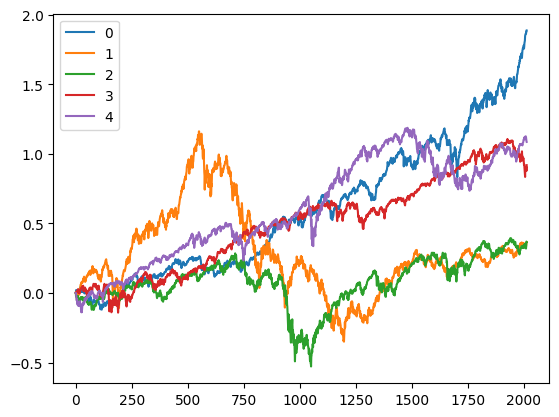

In [16]:
for i in range(len(data_list_qqq)):
    plt.plot(data_list_qqq[i])
plt.legend(["0", "1", "2", "3", "4"])

In [18]:
#### Number of data points
#S = 500

# time inteval
delta = 1

#n = int(S/delta)
n = len(data0_qqq)
y0 = 0
# Observation time
obtime = np.arange(0,n) * delta
print(len(obtime))

2015


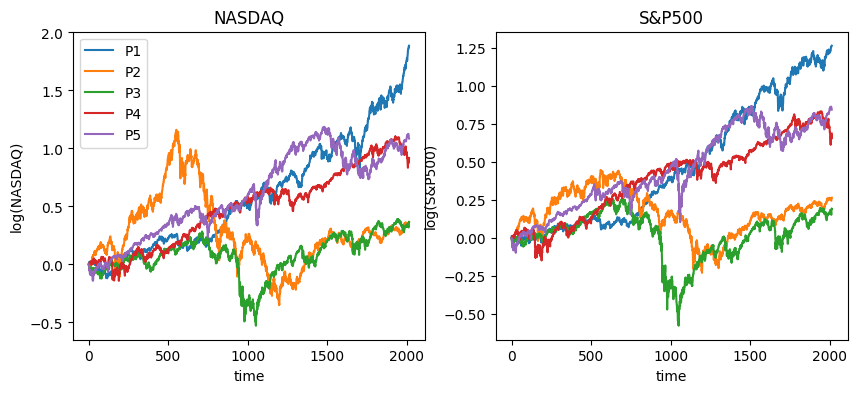

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
for i in range(len(data_list_qqq)):
    ax1.plot(obtime, data_list_qqq[i])
    ax2.plot(obtime, data_list_spy[i])
    ax1.legend(["P1", "P2", "P3", "P4", "P5"])
ax1.title.set_text('NASDAQ')
ax2.title.set_text('S&P500')
ax1.set_xlabel("time", fontsize=10)
ax2.set_xlabel("time", fontsize=10)
ax1.set_ylabel("log(NASDAQ)", fontsize=10)
ax2.set_ylabel("log(S&P500)", fontsize=10)
fig.savefig("../JD_plots/RDA_EDA.pdf") 

In [34]:
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
if torch.cuda.is_available(): 
 dev = "cuda:0" 
else: 
 dev = "cpu"
device = torch.device(dev) 

2.1.2+cu121
True
NVIDIA A100-PCIE-40GB


In [35]:
# Data import
# Default : cuda
torch.set_default_device(device)

sim = [0, 1]

X_raw = []
output_raw = []
for j in sim:
    sim_path = "../../../depot_hyun/hyun/StockPriceRDA/RDA_sim" + str(j) +".pt"
    [tmp_X, tmp_y] = torch.load(sim_path)
    X_raw.append(tmp_X)
    output_raw.append(tmp_y)

X_raw = torch.cat(X_raw, dim = 0)
output_raw = torch.cat(output_raw, dim = 0)

X_raw = X_raw.to(device)
output_raw = output_raw.to(device)

X_raw = X_raw.to("cpu")

a = torch.quantile(X_raw, .001, 0)
a = torch.reshape(a, (1, a.size()[0]))
b = torch.quantile(X_raw, .999, 0)
b = torch.reshape(b, (1, b.size()[0]))

output = []
output.append(output_raw[:,0])
output.append(torch.log(output_raw[:,1]))
output.append(torch.log(output_raw[:,2]))
output.append(torch.log(output_raw[:,3]))
output.append(torch.log(output_raw[:,4]))
output.append(torch.log(output_raw[:,5]))
output = torch.column_stack(output)


X = torch.clone((X_raw - a) / (b - a))
torch.set_default_device(dev)
X = X.to(dev)
output = output.to(dev)

L = X.size()[0]
Lval = 80000
Ltest = 10000

X_train = X[range(0,L-Lval-Ltest),:]
y_train = output[range(0,L-Lval-Ltest),:]

X_val = X[range(L-Lval-Ltest,L-Ltest),:]
y_val = output[range(L-Lval-Ltest,L-Ltest),:]

X_test = X[range(L-Ltest,L),:]
y_test = output[range(L-Ltest,L),:]

print(X_train.size(), X_val.size(),X_test.size())

# Define the input and output dimensions
D_in, H, H2, H3, D_out = X_train.size()[1], 512, 512, 512, y_train.size()[1]

# Create an instance of the Net class with specified dimensions
torch.manual_seed(2725)

# import net
net = Net(D_in, D_out, H = H, H2 = H2, H3 = H3)
model_save_name = 'RDA_nets/RDA_stocks.pt'
path = F"./{model_save_name}"

torch.Size([410000, 76]) torch.Size([80000, 76]) torch.Size([10000, 76])


In [36]:
torch.isnan(X).sum()

tensor(0, device='cuda:0')

In [37]:
for i in range(X.size()[1]):
    print(i, torch.max(X[:,i]), a[0,i], b[0,i])

0 tensor(2.6108, device='cuda:0') tensor(-0.1568) tensor(0.1680)
1 tensor(3.5492, device='cuda:0') tensor(9.4054e-07) tensor(9.7313e-05)
2 tensor(10.1184, device='cuda:0') tensor(3.5169e-09) tensor(2.8468e-05)
3 tensor(19.9436, device='cuda:0') tensor(-6.7740e-06) tensor(7.6420e-06)
4 tensor(60.0193, device='cuda:0') tensor(5.3909e-17) tensor(2.5586e-09)
5 tensor(5.9242, device='cuda:0') tensor(6.5640e-10) tensor(1.0679e-05)
6 tensor(1., device='cuda:0') tensor(0.) tensor(0.9995)
7 tensor(1., device='cuda:0') tensor(0.) tensor(0.9995)
8 tensor(1., device='cuda:0') tensor(0.) tensor(0.9995)
9 tensor(1., device='cuda:0') tensor(0.) tensor(0.9995)
10 tensor(1., device='cuda:0') tensor(0.) tensor(0.9995)
11 tensor(1., device='cuda:0') tensor(0.) tensor(0.9995)
12 tensor(1., device='cuda:0') tensor(0.) tensor(0.9995)
13 tensor(1., device='cuda:0') tensor(0.) tensor(0.9995)
14 tensor(1., device='cuda:0') tensor(0.) tensor(0.9995)
15 tensor(1., device='cuda:0') tensor(0.) tensor(0.9995)
16 te

In [38]:
torch.set_default_device("cpu")

data_qqq = torch.tensor([])
data_spy = torch.tensor([])

for i in range(len(data_list_qqq)):
    tmp = data_list_qqq[i]
    tmp2 = data_list_spy[i]
    n = len(tmp)
    n2 = len(tmp2)
    tmp = torch.tensor(tmp, dtype=torch.float32)
    tmp2 = torch.tensor(tmp2, dtype=torch.float32)
    
    tmp = torch.reshape(tmp, (1,n))
    tmp2 = torch.reshape(tmp2, (1,n2))
    
    tmp = PBJD_RDA_summary(tmp, delta)
    tmp2 = PBJD_RDA_summary(tmp2, delta)
    a = a.to("cpu")
    b = b.to("cpu")
    tmp = (tmp - a) / (b -a )
    tmp2 = (tmp2 - a) / (b -a )
    
    data_qqq = torch.cat((data_qqq, tmp))
    data_spy = torch.cat((data_spy, tmp2))

In [39]:
for i in range(len(data_list_qqq)):
    tmp = data_qqq[i]
    print("min", i, torch.sum(torch.min(X, 0).values.detach().cpu() > tmp))
    print("max", i, torch.sum(torch.max(X, 0).values.detach().cpu() < tmp))

min 0 tensor(0)
max 0 tensor(0)
min 1 tensor(0)
max 1 tensor(0)
min 2 tensor(0)
max 2 tensor(0)
min 3 tensor(0)
max 3 tensor(0)
min 4 tensor(0)
max 4 tensor(0)


In [40]:
X = X.to("cpu")
for i in range(len(data_list_spy)):
    tmp = data_spy[i]
    print("min", i, torch.sum(torch.min(X, 0).values.detach().cpu() > tmp))
    print("max", i, torch.sum(torch.max(X, 0).values.detach().cpu() < tmp))

min 0 tensor(0)
max 0 tensor(0)
min 1 tensor(0)
max 1 tensor(0)
min 2 tensor(0)
max 2 tensor(0)
min 3 tensor(0)
max 3 tensor(0)
min 4 tensor(0)
max 4 tensor(0)


In [41]:
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
if torch.cuda.is_available(): 
 dev = "cuda:0" 
else: 
 dev = "cpu"
device = torch.device(dev)

2.1.2+cu121
True
NVIDIA A100-PCIE-40GB


In [42]:
torch.set_default_device(dev)


from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
# N is batch size; 
# D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
# L = 1000 -> H = 64

# Define the batch size
BATCH_SIZE = 64


# Use torch.utils.data to create a DataLoader 
# that will take care of creating batches 
dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size = BATCH_SIZE, shuffle=True, generator=torch.Generator(device=device))
dataset_size = len(dataloader.dataset)

In [43]:
def weighted_mse_loss(input, target, weight):
        return (weight * (input - target) ** 2).sum()
out_range = [torch.quantile(output,.01, 0).detach().cpu().numpy(), torch.quantile(output,.99, 0).detach().cpu().numpy()]
weight_1 = torch.tensor(1/(out_range[1] - out_range[0])**2)
print(weight_1)

tensor([1.1575e+03, 2.6507e-02, 2.6519e-02, 2.6668e-02, 2.6582e-02, 2.6609e-02],
       device='cuda:0')


In [ ]:
learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate, weight_decay=1e-5)

train_error_plt = []
val_error_plt = []

torch.manual_seed(2000)
N_EPOCHS = 350
# Loop over epochs
for epoch in range(N_EPOCHS):
    for id_batch, (x_batch, y_batch) in enumerate(dataloader):
        y_batch_pred = net(x_batch)
        #loss = loss_fn(y_batch_pred, y_batch)
        loss = weighted_mse_loss(y_batch, y_batch_pred, weight_1)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 10 ==0 and id_batch % 1000 == 0:
            loss, current = loss.item(), (id_batch + 1)* len(x_batch)
            print(f"train_loss: {loss/BATCH_SIZE:>7f}  [{current:>5d}/{dataset_size:>5d}]")

    with torch.no_grad():
           net.eval()
           theta_pred_train = net(X_train)
           #train_loss = loss_fn(theta_pred_train,Y_train) / L_train
           train_loss = weighted_mse_loss(y_train, theta_pred_train, weight_1) /( L - Lval - Ltest )
           
           train_error_plt = np.append(train_error_plt, train_loss.to("cpu"))

           theta_pred_val = net(X_val)
           #val_loss = loss_fn(Y_val, theta_pred_val) / L_val
           val_loss = weighted_mse_loss(y_val, theta_pred_val, weight_1) / Lval
           
           val_error_plt = np.append(val_error_plt, val_loss.to("cpu"))

    if epoch % 10 ==0:
        print(f"Epoch {epoch + 1}\n-------------------------------")
        print(f"train_loss {train_loss:>7f} val_loss {val_loss:>7f}")
        #print("learning rate: ", learning_rate, ", sim: ", sim)

    ## Choose Best Model
    if val_error_plt[epoch] == np.min(val_error_plt):
         best=epoch
         torch.save(net.state_dict(), path)

    if epoch % 100 ==99:
        net.load_state_dict(torch.load(path))
        learning_rate = max(learning_rate * 1e-1, 1e-9)

train_loss: 250.339920  [   64/410000]
train_loss: 1.007570  [64064/410000]
train_loss: 0.507449  [128064/410000]
train_loss: 0.297428  [192064/410000]
train_loss: 0.390159  [256064/410000]
train_loss: 0.237995  [320064/410000]
train_loss: 0.169574  [384064/410000]
Epoch 1
-------------------------------
train_loss 0.538175 val_loss 0.432596
train_loss: 0.139383  [   64/410000]
train_loss: 0.101082  [64064/410000]
train_loss: 0.126840  [128064/410000]
train_loss: 0.135459  [192064/410000]
train_loss: 0.108779  [256064/410000]
train_loss: 0.108335  [320064/410000]
train_loss: 0.117056  [384064/410000]
Epoch 11
-------------------------------
train_loss 0.109941 val_loss 0.112565
train_loss: 0.100192  [   64/410000]
train_loss: 0.106079  [64064/410000]
train_loss: 0.087880  [128064/410000]
train_loss: 0.090672  [192064/410000]


In [44]:
print(np.min(val_error_plt))

NameError: name 'val_error_plt' is not defined

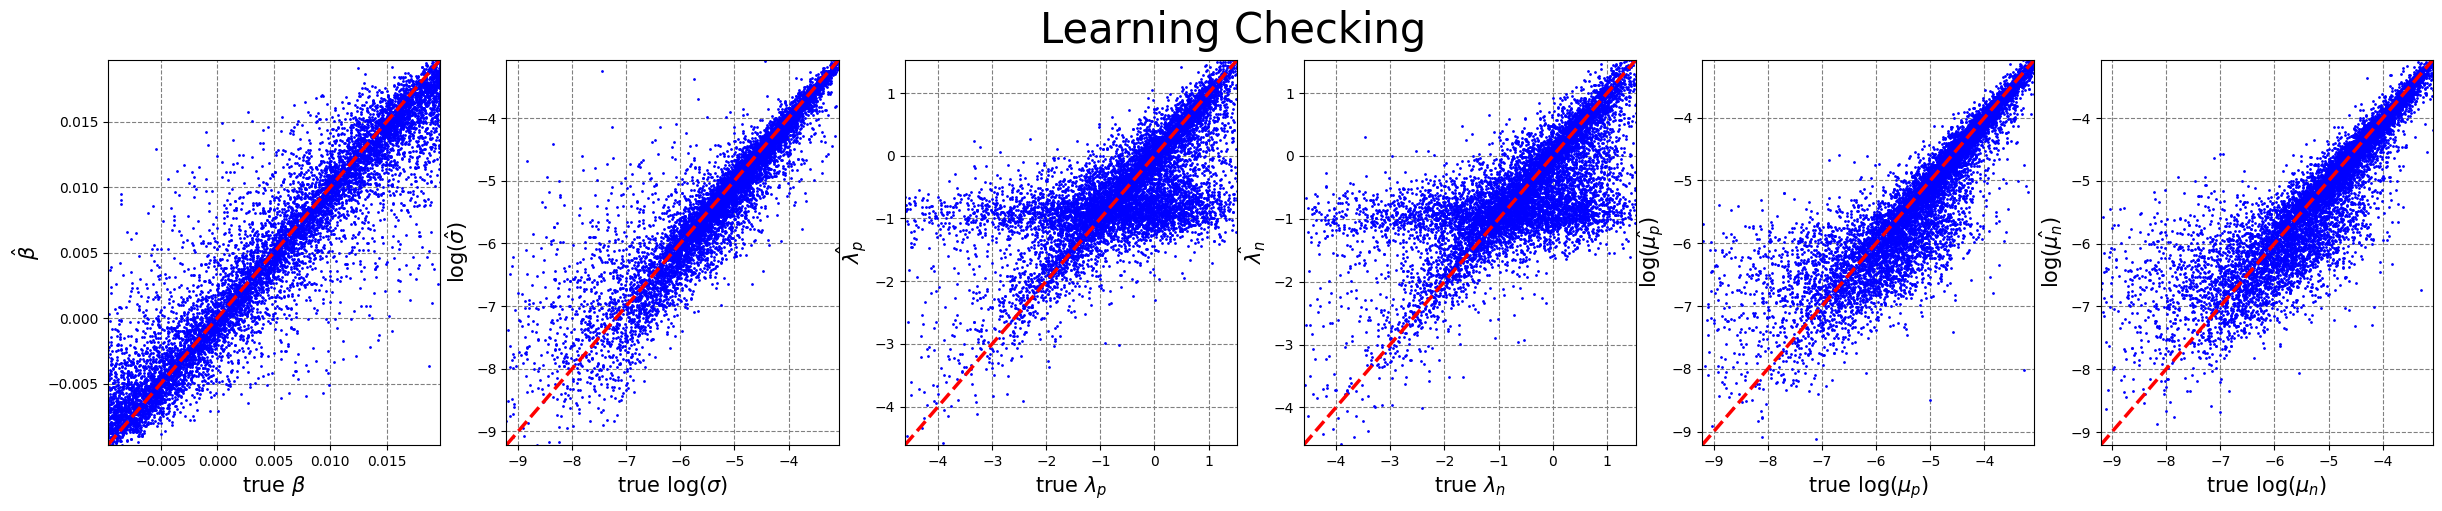

In [47]:
net.load_state_dict(torch.load(path))
net.eval()
torch.set_default_device("cpu")

net = net.to("cpu")
X_test = X_test.to("cpu")
y_test = y_test.to("cpu")

#true_name = [r'true $\beta$', r'true $log(\sigma)$', r'true $log(\lambda_p$)', r'true $log(\lambda_n)$', r'true $log(\eta_p)$', r'true $log(\eta_n)$']
true_name = [r'true $\beta$', r'true $\log(\sigma)$',  r'true $\lambda_p$', r'true $\lambda_n$', 
             r'true $\log(\mu_p)$', r'true $\log(\mu_n)$']

#esti_name = [r'$log(\hat{\beta})$', r'$log(\hat{\sigma})$', r'$log(\hat{\lambda_p})$', r'$log(\hat{\lambda_n})$', r'$log(\hat{\eta_p})$', r'$log(\hat{\eta_n})$']
esti_name = [r'$\hat{\beta}$', r'$\log(\hat{\sigma})$',  r'$\hat{\lambda_p}$', r'$\hat{\lambda_n}$', 
             r'$\log(\hat{\mu_p})$', r'$\log(\hat{\mu_n})$']


with torch.no_grad():
    net.eval()
    tmp = net(X_test)
    tmp = tmp.detach().cpu().numpy()

## Plot for model checking

lim_left = torch.quantile(output,.01, 0).detach().cpu().numpy()
lim_right = torch.quantile(output,.99, 0).detach().cpu().numpy()


fig, axes = plt.subplots(1, len(tmp[0]), figsize=(30,5))
fig.suptitle('Learning Checking', fontsize= 30)

for i in range(len(tmp[0])):
    lim0 = lim_left[i]
    lim1 = lim_right[i]
    
    tmp1 = tmp[:, i]
    axes[i].scatter(y_test[:,i], tmp1, marker='o', color='b', s= 1)
    axes[i].set_xlabel(true_name[i], fontsize=15)
    axes[i].set_ylabel(esti_name[i], fontsize=15)
    axes[i].plot(np.linspace(lim0, lim1, 1000), np.linspace(lim0, lim1, 1000), color = "red", linestyle='dashed', linewidth = 2.5)
    axes[i].set_axisbelow(True)
    axes[i].grid(color='gray', linestyle='dashed')
    axes[i].set_ylim([lim0, lim1])
    axes[i].set_xlim([lim0, lim1])
    

plt.show()
fig.savefig("../JD_plots/RDA_LC.pdf") 

In [47]:
torch.set_default_device(device)
net.load_state_dict(torch.load(path))
net.eval()
net = net.to("cpu")
torch.set_default_device("cpu")

In [48]:
results_qqq = net(data_qqq.to("cpu")).detach()
results_qqq_exp = torch.exp(net(data_qqq.to("cpu"))).detach()

results_spy = net(data_spy.to("cpu")).detach()
results_spy_exp = torch.exp(net(data_spy.to("cpu"))).detach()

#results_qqq = torch.stack((results_qqq[:,0], results_qqq_exp[:,1], results_qqq[:,2], results_qqq[:,3], results_qqq_exp[:,4], results_qqq_exp[:,5]),1)
results_qqq = torch.stack((results_qqq[:,0], results_qqq_exp[:,1], results_qqq_exp[:,2], results_qqq_exp[:,3], 1/results_qqq_exp[:,4], 1/results_qqq_exp[:,5]),1)

#results_spy = torch.stack((results_spy[:,0], results_spy_exp[:,1], results_spy[:,2], results_spy[:,3], results_spy_exp[:,4], results_spy_exp[:,5]),1)
results_spy = torch.stack((results_spy[:,0], results_spy_exp[:,1], results_spy_exp[:,2], results_spy_exp[:,3], 1/results_spy_exp[:,4], 1/results_spy_exp[:,5]),1)

print(results_qqq)
print(results_spy)

tensor([[2.4066e-03, 5.8220e-03, 3.8882e-01, 5.0562e-01, 1.4657e+02, 1.3965e+02],
        [5.1039e-03, 6.0089e-03, 6.4381e-01, 1.4929e+00, 1.0823e+02, 1.2713e+02],
        [1.8344e-03, 6.2142e-03, 3.4435e-01, 6.4492e-01, 9.3478e+01, 1.1293e+02],
        [2.9105e-04, 2.8547e-03, 9.0609e-01, 8.2778e-01, 2.2589e+02, 1.7019e+02],
        [1.0656e-03, 4.4872e-03, 5.3273e-01, 6.4033e-01, 1.2445e+02, 1.0203e+02]])
tensor([[-1.3358e-03,  3.6681e-03,  8.9713e-01,  3.1458e-01,  2.3838e+02,
          1.4052e+02],
        [ 1.3961e-03,  5.6645e-03,  6.1197e-01,  7.0933e-01,  1.6968e+02,
          1.6354e+02],
        [ 1.2792e-03,  5.0742e-03,  3.0973e-01,  5.1519e-01,  8.8896e+01,
          9.9395e+01],
        [-7.8562e-04,  1.8121e-03,  1.0485e+00,  6.2530e-01,  2.6828e+02,
          1.6644e+02],
        [-1.2716e-04,  4.6852e-03,  3.8043e-01,  2.4499e-01,  1.3617e+02,
          8.0845e+01]])


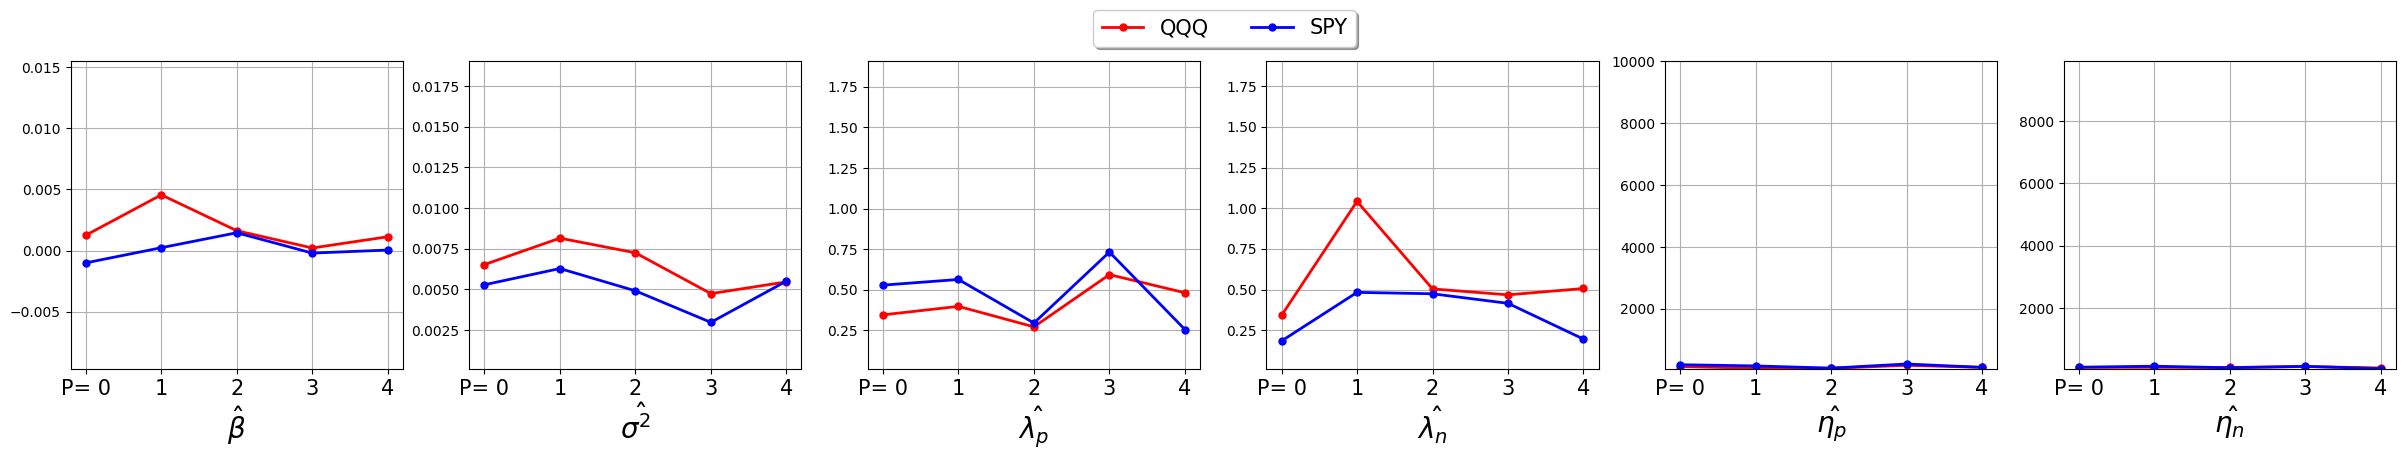

In [271]:
out_range_plot = [torch.quantile(output,.01, 0).detach().cpu().numpy(), torch.quantile(output,.85, 0).detach().cpu().numpy()]

output_range = []
exp_ind = [1, 2, 3]
exp_ind_n = [4, 5]

for i in range(output.size()[1]):
    if i in exp_ind:
        output_range.append(np.exp(np.array(out_range_plot)[:,i]))
    elif i in exp_ind_n:
        output_range.append(np.sort(np.exp(-np.array(out_range_plot)[:,i])))
    else:
        output_range.append(np.array(out_range_plot)[:,i])


#output_range = torch.quantile(output.detach().cpu(),torch.tensor([.01, .99]), 0).detach().cpu().numpy()
fig, axs = plt.subplots(1, results_qqq.size()[1])
esti_name = [r'$\hat{\beta}$', r'$\hat{\sigma^2}$', r'$\hat{\lambda_p}$', r'$\hat{\lambda_n}$', r'$\hat{\eta_p}$', r'$\hat{\eta_n}$']

fig.set_figwidth(30)
fig.set_figheight(4)

nums = []
nums_ticks = []
for j in range(len(data_list_qqq)):
    nums.append(j)
    if j ==0:
        nums_ticks.append("P= 0")
    else:
        nums_ticks.append(str(j))
        

    
for j in range(results_qqq.size()[1]): # Scenarios
    #axs[j].plot(nums, MCMC_results[j], linestyle = 'dotted',marker = 's', 
    #            markersize = 5, color = "green", linewidth=2)
    #axs[0,j].set_xlim(xlim[j])
    #axs[0,j].set_xticks(x_S[j])
    axs[j].grid()
    axs[j].set_xlabel(esti_name[j], fontsize=20)
    axs[j].set_xticks(nums, nums_ticks, fontsize = 15)
    axs[j].set_ylim(output_range[j])

    
    axs[j].plot(nums, results_qqq[:,j], marker = 'o', 
                    markersize =5, color = "red", linewidth=2)
    
    axs[j].plot(nums, results_spy[:,j], marker = 'o', 
                    markersize =5, color = "blue", linewidth=2)
    
    
    axs[0].legend(['QQQ', 'SPY'], loc = "best", fontsize=15, 
                  bbox_to_anchor=(3.9, +1.2), fancybox=True, shadow=True, ncol=6)

In [54]:
path_cal = "./RDA_sim/RDA_sim"
X_cal = []
y_cal = []

sim_num = []
for j in range(2, 30):
    if sim is not j:
        sim_num.append(j)

for j in sim_num:
    path_tmp = path_cal+str(j)+".pt"
    [tmp_X, tmp_y] = torch.load(path_tmp)
    X_cal.append(tmp_X)
    y_cal.append(tmp_y)

X_cal = torch.cat(X_cal, dim = 0)
y_cal = torch.cat(y_cal, dim = 0)

X_cal = torch.clone((X_cal - a) / (b - a))

output_cal = []
output_cal.append(y_cal[:,0])
output_cal.append(torch.log(y_cal[:,1]))
output_cal.append(torch.log(y_cal[:,2]))
output_cal.append(torch.log(y_cal[:,3]))
output_cal.append(torch.log(y_cal[:,4]))
output_cal.append(torch.log(y_cal[:,5]))

output_cal = torch.column_stack(output_cal)

In [ ]:
for ratio in [.03, .04, .05]:
    for j in [0, 1, 2, 3, 4]:
        torch.manual_seed(2720)
        results_qqq_j = conf_inf_sd(data_qqq[j], X_cal, output_cal, net, ratio)
        torch.save(results_qqq_j, "RDA_calibrate/results_nasdq_" + str(j)+ str(ratio) + ".pt")

train_loss: 0.451984  [   64/73500]
train_loss: 0.385652  [ 6464/73500]
train_loss: 0.383000  [12864/73500]
train_loss: 0.342132  [19264/73500]
train_loss: 0.340874  [25664/73500]
train_loss: 0.350839  [32064/73500]
train_loss: 0.317898  [38464/73500]
train_loss: 0.308425  [44864/73500]
train_loss: 0.305352  [51264/73500]
train_loss: 0.284686  [57664/73500]
train_loss: 0.274337  [64064/73500]
train_loss: 0.241573  [70464/73500]
Epoch 1
-------------------------------
train_loss 0.254037 val_loss 0.255445
Epoch 31
-------------------------------
train_loss 0.037050 val_loss 0.037755
train_loss: 0.038782  [   64/73500]
train_loss: 0.039447  [ 6464/73500]
train_loss: 0.036637  [12864/73500]
train_loss: 0.035949  [19264/73500]
train_loss: 0.035047  [25664/73500]
train_loss: 0.032608  [32064/73500]
train_loss: 0.033690  [38464/73500]
train_loss: 0.037460  [44864/73500]
train_loss: 0.037285  [51264/73500]
train_loss: 0.032612  [57664/73500]
train_loss: 0.037747  [64064/73500]
train_loss: 0.0

train_loss: 0.034648  [25664/73500]
train_loss: 0.025323  [32064/73500]
train_loss: 0.033355  [38464/73500]
train_loss: 0.025169  [44864/73500]
train_loss: 0.034275  [51264/73500]
train_loss: 0.035838  [57664/73500]
train_loss: 0.035506  [64064/73500]
train_loss: 0.032488  [70464/73500]
Epoch 211
-------------------------------
train_loss 0.029182 val_loss 0.030012
Epoch 241
-------------------------------
train_loss 0.029094 val_loss 0.030038
0.02993929
train_loss: 0.387572  [   64/73500]
train_loss: 0.378931  [ 6464/73500]
train_loss: 0.389692  [12864/73500]
train_loss: 0.344916  [19264/73500]
train_loss: 0.334474  [25664/73500]
train_loss: 0.297513  [32064/73500]
train_loss: 0.287205  [38464/73500]
train_loss: 0.309007  [44864/73500]
train_loss: 0.279066  [51264/73500]
train_loss: 0.261775  [57664/73500]
train_loss: 0.261874  [64064/73500]
train_loss: 0.233468  [70464/73500]
Epoch 1
-------------------------------
train_loss 0.238322 val_loss 0.238841
Epoch 31
----------------------

train_loss: 0.030704  [89664/98000]
train_loss: 0.032659  [96064/98000]
Epoch 121
-------------------------------
train_loss 0.033945 val_loss 0.034500
train_loss: 0.035131  [   64/98000]
train_loss: 0.044819  [ 6464/98000]
train_loss: 0.029163  [12864/98000]
train_loss: 0.046947  [19264/98000]
train_loss: 0.028910  [25664/98000]
train_loss: 0.033136  [32064/98000]
train_loss: 0.033343  [38464/98000]
train_loss: 0.031138  [44864/98000]
train_loss: 0.033865  [51264/98000]
train_loss: 0.035469  [57664/98000]
train_loss: 0.031275  [64064/98000]
train_loss: 0.033452  [70464/98000]
train_loss: 0.034611  [76864/98000]
train_loss: 0.037631  [83264/98000]
train_loss: 0.027818  [89664/98000]
train_loss: 0.033744  [96064/98000]
Epoch 151
-------------------------------
train_loss 0.033857 val_loss 0.034453
Epoch 181
-------------------------------
train_loss 0.033835 val_loss 0.034525
train_loss: 0.030129  [   64/98000]
train_loss: 0.039132  [ 6464/98000]
train_loss: 0.031796  [12864/98000]
trai

In [ ]:
for ratio in [.03, .04, .05]:
    for j in [0, 1, 2, 3, 4]:
        torch.manual_seed(2720)
        results_spy_j = conf_inf_sd(data_spy[j], X_cal, output_cal, net, ratio)
        torch.save(results_spy_j, "RDA_calibrate/results_sp500_" + str(j)+ str(ratio) +".pt")

train_loss: 0.459927  [   64/76125]
train_loss: 0.462834  [ 6464/76125]
train_loss: 0.417748  [12864/76125]
train_loss: 0.423126  [19264/76125]
train_loss: 0.390625  [25664/76125]
train_loss: 0.352159  [32064/76125]
train_loss: 0.340056  [38464/76125]
train_loss: 0.325203  [44864/76125]
train_loss: 0.314313  [51264/76125]
train_loss: 0.283193  [57664/76125]
train_loss: 0.305113  [64064/76125]
train_loss: 0.282190  [70464/76125]
Epoch 1
-------------------------------
train_loss 0.274857 val_loss 0.275513


# QQQ

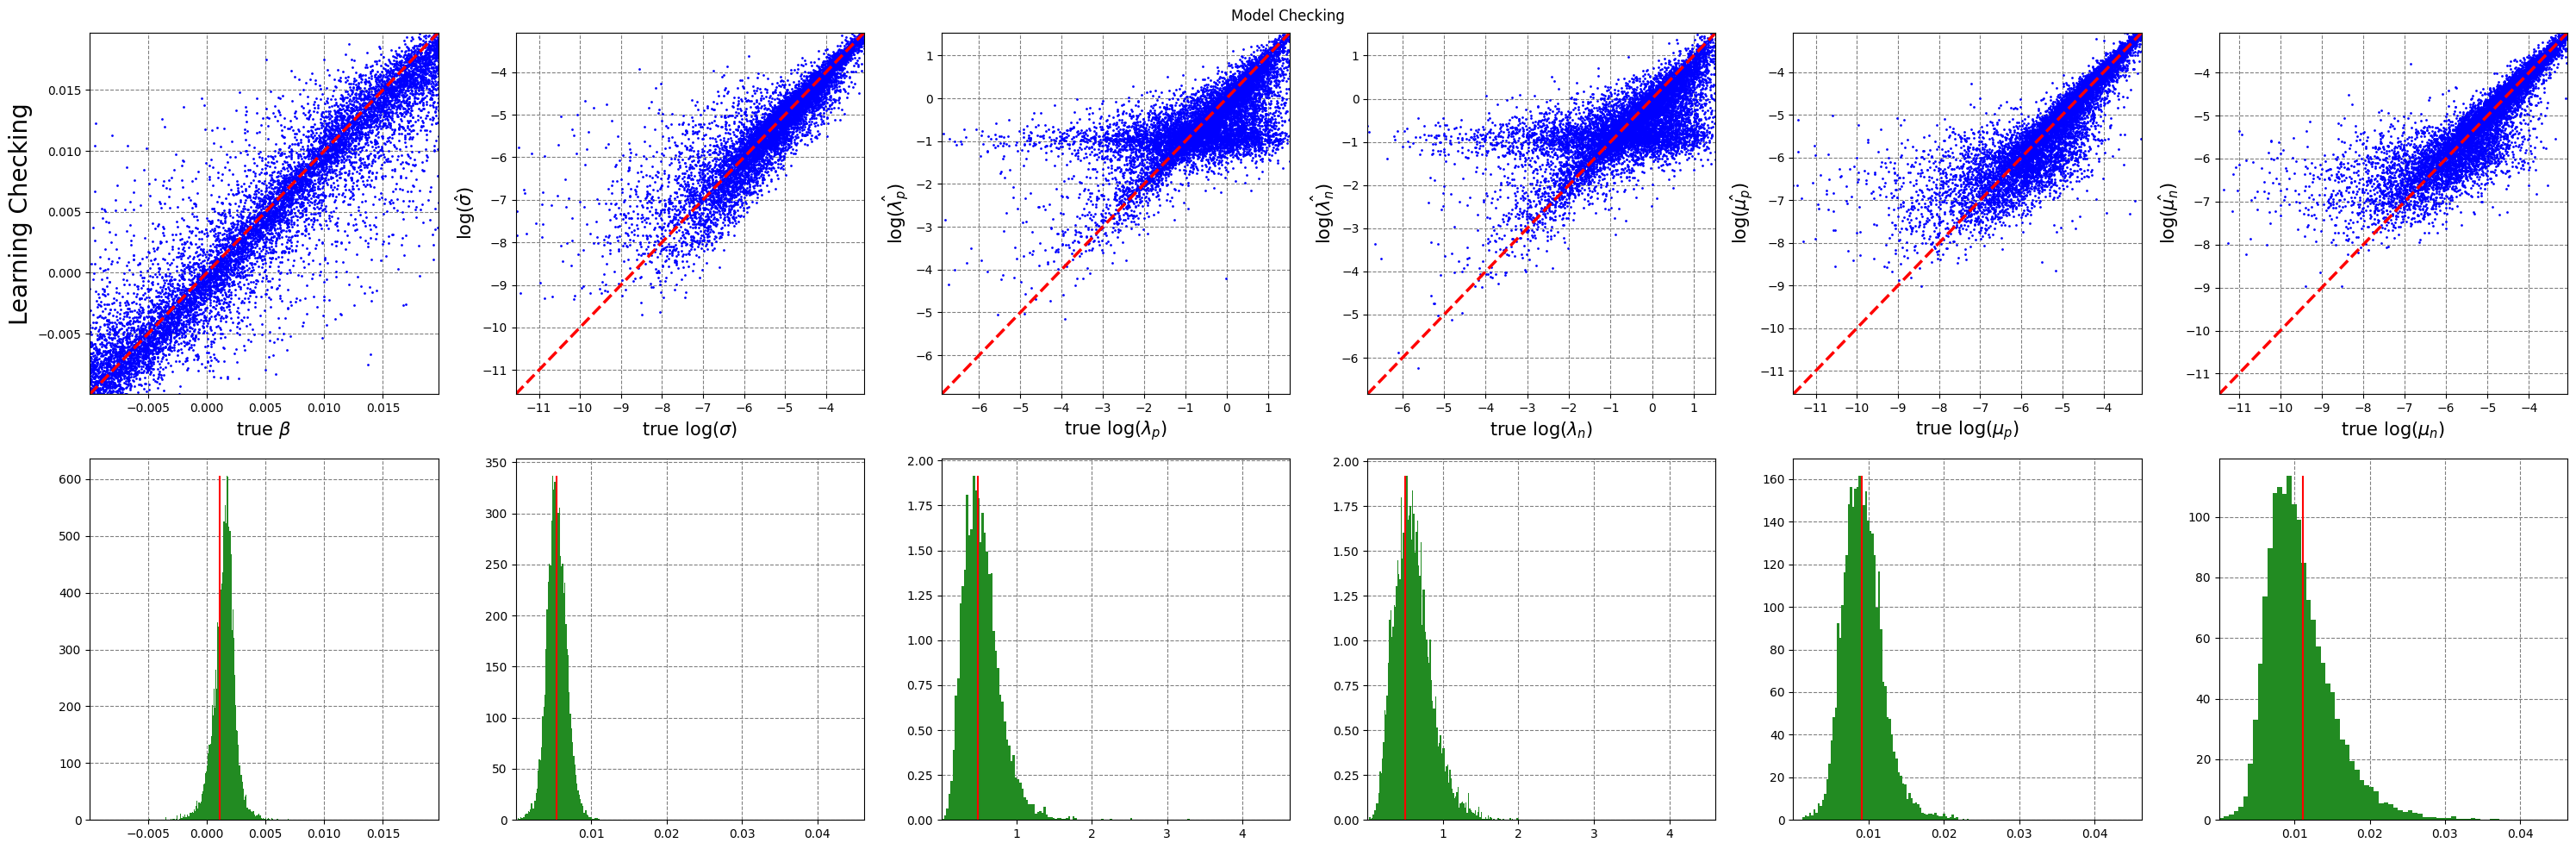

In [289]:
ind = 4
inf_qqq = torch.load("RDA_calibrate/results_qqq_" +str(ind)+".pt")
import matplotlib.pyplot as plt
true_name = [r'true $\beta$', r'true $\log(\sigma)$',  r'true $\log(\lambda_p)$', r'true $\log(\lambda_n)$', 
             r'true $\log(\mu_p)$', r'true $\log(\mu_n)$']
esti_name = [r'$\hat{\beta}$', r'$\log(\hat{\sigma})$',  r'$\log(\hat{\lambda_p})$', r'$\log(\hat{\lambda_n})$', 
             r'$\log(\hat{\mu_p})$', r'$\log(\hat{\mu_n})$']

exp_ind = [1, 2, 3, 4, 5]

obs = torch.reshape(data_qqq[ind], (1, data_qqq[ind].size()[0]))
#obs = data_spy[0]


# First sample
est = []
samples = []
for j in range(len(true_name)):
    if j in exp_ind:
        samples.append(np.exp(inf_qqq[1][:,j].detach().cpu().numpy()))
        est.append(np.exp(net(obs).detach()[0][j]))
    else:
        samples.append(inf_qqq[1][:,j].detach().cpu().numpy())
        est.append(net(obs).detach()[0][j])

weights = np.copy(inf_qqq[0].detach().cpu().numpy())

with torch.no_grad():
    net.eval()
    tmp = net(X_test)
    tmp = tmp.detach().cpu().numpy()

## Plot for model checking

lim_left = torch.quantile(output,.001, 0).detach().cpu().numpy()
lim_right = torch.quantile(output,.99, 0).detach().cpu().numpy()

fig, axs = plt.subplots(2, len(tmp[0]), figsize=(30,10))
fig.suptitle('Model Checking')


for i in range(len(tmp[0])):
    lim0 = lim_left[i]
    lim1 = lim_right[i]
    tmp1 = tmp[:, i]
    axs[0,i].scatter(y_test[:,i], tmp1, marker='o', color='b', s= 1)
    axs[0,i].set_xlabel(true_name[i], fontsize=15)
    axs[0,i].set_ylabel(esti_name[i], fontsize=15)
    axs[0,i].plot(np.linspace(lim0, lim1, 1000), np.linspace(lim0, lim1, 1000), color = "red", linestyle='dashed', linewidth = 2.5)
    axs[0,i].set_axisbelow(True)
    axs[0,i].grid(color='gray', linestyle='dashed')
    axs[0,i].set_ylim([lim0, lim1])
    axs[0,i].set_xlim([lim0, lim1])
    axs[0,0].set_ylabel("Learning Checking", fontsize = 20)


for i in range(len(true_name)):
    lim0 = lim_left[i]
    lim1 = lim_right[i]
    if i in exp_ind:
        lim0 = np.exp(lim0); lim1 = np.exp(lim1)
    y, x, _ = axs[1,i].hist(samples[i], density=True, weights = weights, bins = 200, color = "forestgreen")
    axs[1, i].set_axisbelow(True)
    axs[1, i].grid(color='gray', linestyle='dashed')
    axs[1, i].set_xlim([lim0, lim1])
    axs[1, i].vlines(est[i], 0, max(y), color = 'red')
    #axs[1, i].vlines(true_param[i], 0, max(y), color = 'blue', linestyle ="dashdot")
    #axs[1, i].legend(['NCoin-JDP', 'true'], loc = "upper right", fontsize=15) 
fig.tight_layout()
#fig.savefig("../JD_plots/MROUJ_infer.pdf") 

# SPY

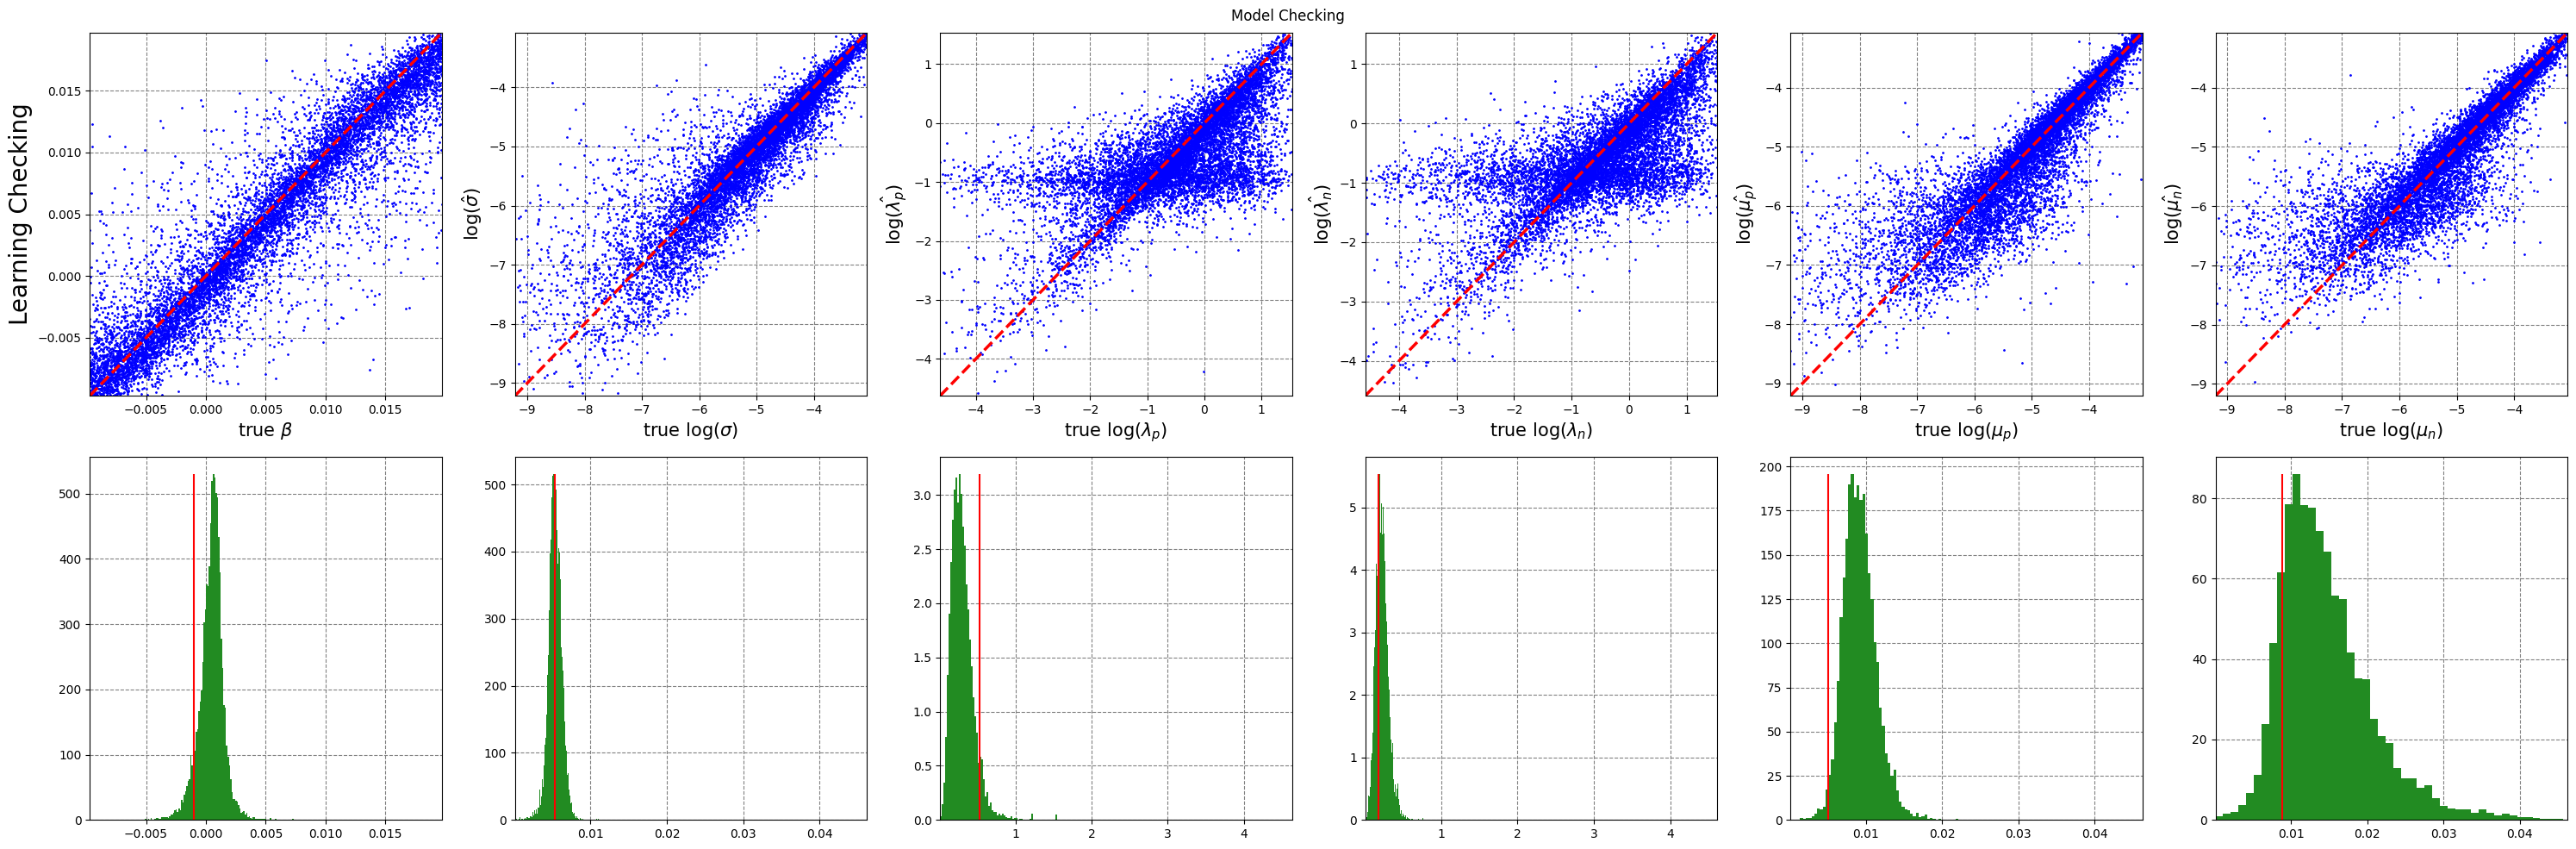

In [290]:
ind = 4
inf_spy = torch.load("RDA_calibrate/results_spy_" +str(ind)+".pt")

import matplotlib.pyplot as plt
true_name = [r'true $\beta$', r'true $\log(\sigma)$',  r'true $\log(\lambda_p)$', r'true $\log(\lambda_n)$', 
             r'true $\log(\mu_p)$', r'true $\log(\mu_n)$']
esti_name = [r'$\hat{\beta}$', r'$\log(\hat{\sigma})$',  r'$\log(\hat{\lambda_p})$', r'$\log(\hat{\lambda_n})$', 
             r'$\log(\hat{\mu_p})$', r'$\log(\hat{\mu_n})$']

exp_ind = [1, 2, 3, 4, 5]

obs = torch.reshape(data_spy[ind], (1, data_spy[ind].size()[0]))

import matplotlib.pyplot as plt
true_name = [r'true $\beta$', r'true $\log(\sigma)$',  r'true $\log(\lambda_p)$', r'true $\log(\lambda_n)$', 
             r'true $\log(\mu_p)$', r'true $\log(\mu_n)$']
esti_name = [r'$\hat{\beta}$', r'$\log(\hat{\sigma})$',  r'$\log(\hat{\lambda_p})$', r'$\log(\hat{\lambda_n})$', 
             r'$\log(\hat{\mu_p})$', r'$\log(\hat{\mu_n})$']

obs = torch.reshape(data_spy[0], (1, data_spy[0].size()[0]))
#obs = data_spy[0]


# First sample
est = []
samples = []
for j in range(len(true_name)):
    if j in exp_ind:
        samples.append(np.exp(inf_spy[1][:,j].detach().cpu().numpy()))
        est.append(np.exp(net(obs).detach()[0][j]))
    else:
        samples.append(inf_spy[1][:,j].detach().cpu().numpy())
        est.append(net(obs).detach()[0][j])

weights = np.copy(inf_spy[0].detach().cpu().numpy())

with torch.no_grad():
    net.eval()
    tmp = net(X_test)
    tmp = tmp.detach().cpu().numpy()

## Plot for model checking

lim_left = torch.quantile(output,.01, 0).detach().cpu().numpy()
lim_right = torch.quantile(output,.99, 0).detach().cpu().numpy()

fig, axs = plt.subplots(2, len(tmp[0]), figsize=(30,10))
fig.suptitle('Model Checking')


for i in range(len(tmp[0])):
    lim0 = lim_left[i]
    lim1 = lim_right[i]
    tmp1 = tmp[:, i]
    axs[0,i].scatter(y_test[:,i], tmp1, marker='o', color='b', s= 1)
    axs[0,i].set_xlabel(true_name[i], fontsize=15)
    axs[0,i].set_ylabel(esti_name[i], fontsize=15)
    axs[0,i].plot(np.linspace(lim0, lim1, 1000), np.linspace(lim0, lim1, 1000), color = "red", linestyle='dashed', linewidth = 2.5)
    axs[0,i].set_axisbelow(True)
    axs[0,i].grid(color='gray', linestyle='dashed')
    axs[0,i].set_ylim([lim0, lim1])
    axs[0,i].set_xlim([lim0, lim1])
    axs[0,0].set_ylabel("Learning Checking", fontsize = 20)


for i in range(len(true_name)):
    lim0 = lim_left[i]
    lim1 = lim_right[i]
    if i in exp_ind:
        lim0 = np.exp(lim0); lim1 = np.exp(lim1)
    y, x, _ = axs[1,i].hist(samples[i], density=True, weights = weights, bins = 200, color = "forestgreen")
    axs[1, i].set_axisbelow(True)
    axs[1, i].grid(color='gray', linestyle='dashed')
    axs[1, i].set_xlim([lim0, lim1])
    axs[1, i].vlines(est[i], 0, max(y), color = 'red')
    #axs[1, i].vlines(true_param[i], 0, max(y), color = 'blue', linestyle ="dashdot")
    #axs[1, i].legend(['NCoin-JDP', 'true'], loc = "upper right", fontsize=15) 
fig.tight_layout()
#fig.savefig("../JD_plots/MROUJ_infer.pdf") 

In [291]:
Bayes_conf_inf = [[],[]]
stocks = ["qqq", "spy"]

for stock in stocks:
    ind= 0
    inf_info = torch.load("RDA_calibrate/results_" + str(stock) +"_" +str(ind)+".pt")
    
    samples = []
    for j in range(len(true_name)):
        if j in exp_ind:
            samples.append(np.exp(inf_info[1][:,j].detach().cpu().numpy()))
        else:
            samples.append(inf_info[1][:,j].detach().cpu().numpy())
    
    for j in range(len(true_name)):
        weights = np.copy(inf_info[0].detach().cpu().numpy())
        if stock == "qqq":
            Bayes_conf_inf[0].append(weighted_quantile(samples[j], [0.05, 0.95], weights))
        else: 
            Bayes_conf_inf[1].append(weighted_quantile(samples[j], [0.05, 0.95], weights))

In [292]:
np.array([np.sort(np.exp(-np.array(out_range_plot)[:,i]))[0],300])
output_range

[array([-0.00969617,  0.01848729], dtype=float32),
 array([9.9397941e-05, 2.9978385e-02], dtype=float32),
 array([0.00980734, 3.016778  ], dtype=float32),
 array([0.01018024, 3.0020053 ], dtype=float32),
 array([ 33.31988907, 350.        ]),
 array([ 33.26423264, 350.        ])]

In [321]:
def mad_np(sam):
    return np.median(np.absolute(sam - np.mean(sam)))

In [302]:
# Sampling
size = 10000

exp_ind = [1, 2, 3]
exp_ind_n = [4, 5]    
stocks = ['nasdq', 'sp500']

sam = [] # 2* 5 * 3 * 6 * 500
for stock in stocks:
    sam_stock = []
    for ind in range(len(data_qqq)):
        sam_0 = [] 
        for r in range(3):
            results = torch.load("RDA_calibrate/results_" + str(stock) + "_" + str(ind)+ "0.0"+ str(r+3)+ ".pt")
            sam_1 = [] # size 6 * size
            for j in range(results[1].size()[1]):
                random.seed(10)
                samples_1 = []
                if j in exp_ind:
                    samples_1.append(np.exp(results[1][:,j].detach().cpu().numpy()))
                elif j in exp_ind_n:
                    samples_1.append(np.exp(-results[1][:,j].detach().cpu().numpy()))
                else:
                    samples_1.append(results[1][:,j].detach().cpu().numpy())
                vec = samples_1[0]
                np.random.seed(1)
                weights = np.copy(results[0].detach().cpu().numpy())
                P = weights/weights.sum()

                sam_2 = np.random.choice(vec,size,replace=True, p=P)
                sam_1.append(sam_2) 
            sam_0.append(sam_1)
        sam_stock.append(np.concatenate(sam_0, axis = 1)) # 5 * 6 * (size * 3) , # 6 * (size * 3)
    sam.append(sam_stock) # 2* 5 * 3 * 6

In [303]:
# Interval, and mad
Bayes_conf_intvl = []
Bayes_conf_mod = []
Bayes_conf_mad = []

for stock in range(len(stocks)):
    conf_intvl_0 = []
    conf_mad_0 = []
    conf_mod_0 = []
    for ind in range(len(data_qqq)):
        conf_intvl_1 = []
        conf_mad_1 = []
        conf_mod_1 = []
        for j in range(results_qqq.size()[1]):
            samples = sam[stock][ind][j]
            hpd_source = hpd_grid(samples, 0.1, 5)
            np.random.seed(1)
            conf_intvl_1.append(np.array(hpd_source[0][0]))
            conf_mad_1.append(mad_np(samples))
            conf_mod_1.append(hpd_source[3][0])
            
        conf_intvl_0.append(conf_intvl_1)
        conf_mad_0.append(conf_mad_1)
        conf_mod_0.append(conf_mod_1)
        
    Bayes_conf_intvl.append(conf_intvl_0)
    Bayes_conf_mad.append(conf_mad_0)
    Bayes_conf_mod.append(conf_mod_0)

/tmp/ipykernel_15959/1091780546.py:30: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(sample)


In [304]:
# TEJ
TEJ_sam = []
tmp = np.array(sam)
for i in range(2):
    TEJ_sam_0 = []
    for j in range(len(data_qqq)):
        TEJ_sam_1 = []
        for k in range(2): # positive  & negative
            TEJ_sam_1.append(tmp[i,j,k+2,:]/tmp[i,j,k+4,:])
        TEJ_sam_0.append(TEJ_sam_1)
    TEJ_sam.append(TEJ_sam_0)
    
tmp2 = np.array(TEJ_sam)
print(tmp2.shape)
TEJ_mod = []
TEJ_mad = []

for i in range(2):
    TEJ_mod_0 = []
    TEJ_mad_0 = []
    for j in range(len(data_qqq)):
        TEJ_mod_1 = []
        TEJ_mad_1 = []
        for k in range(2):
            np.random.seed(1)
            samples = tmp2[i,j,k,:]
            hpd_source = hpd_grid(samples, 0.1, 5)
            TEJ_mod_1.append(hpd_source[3][0])
            TEJ_mad_1.append(mad_np(samples))
        TEJ_mod_0.append(TEJ_mod_1)
        TEJ_mad_0.append(TEJ_mad_1)
    TEJ_mod.append(TEJ_mod_0)
    TEJ_mad.append(TEJ_mad_0)

(2, 5, 2, 30000)


/tmp/ipykernel_15959/1091780546.py:30: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(sample)


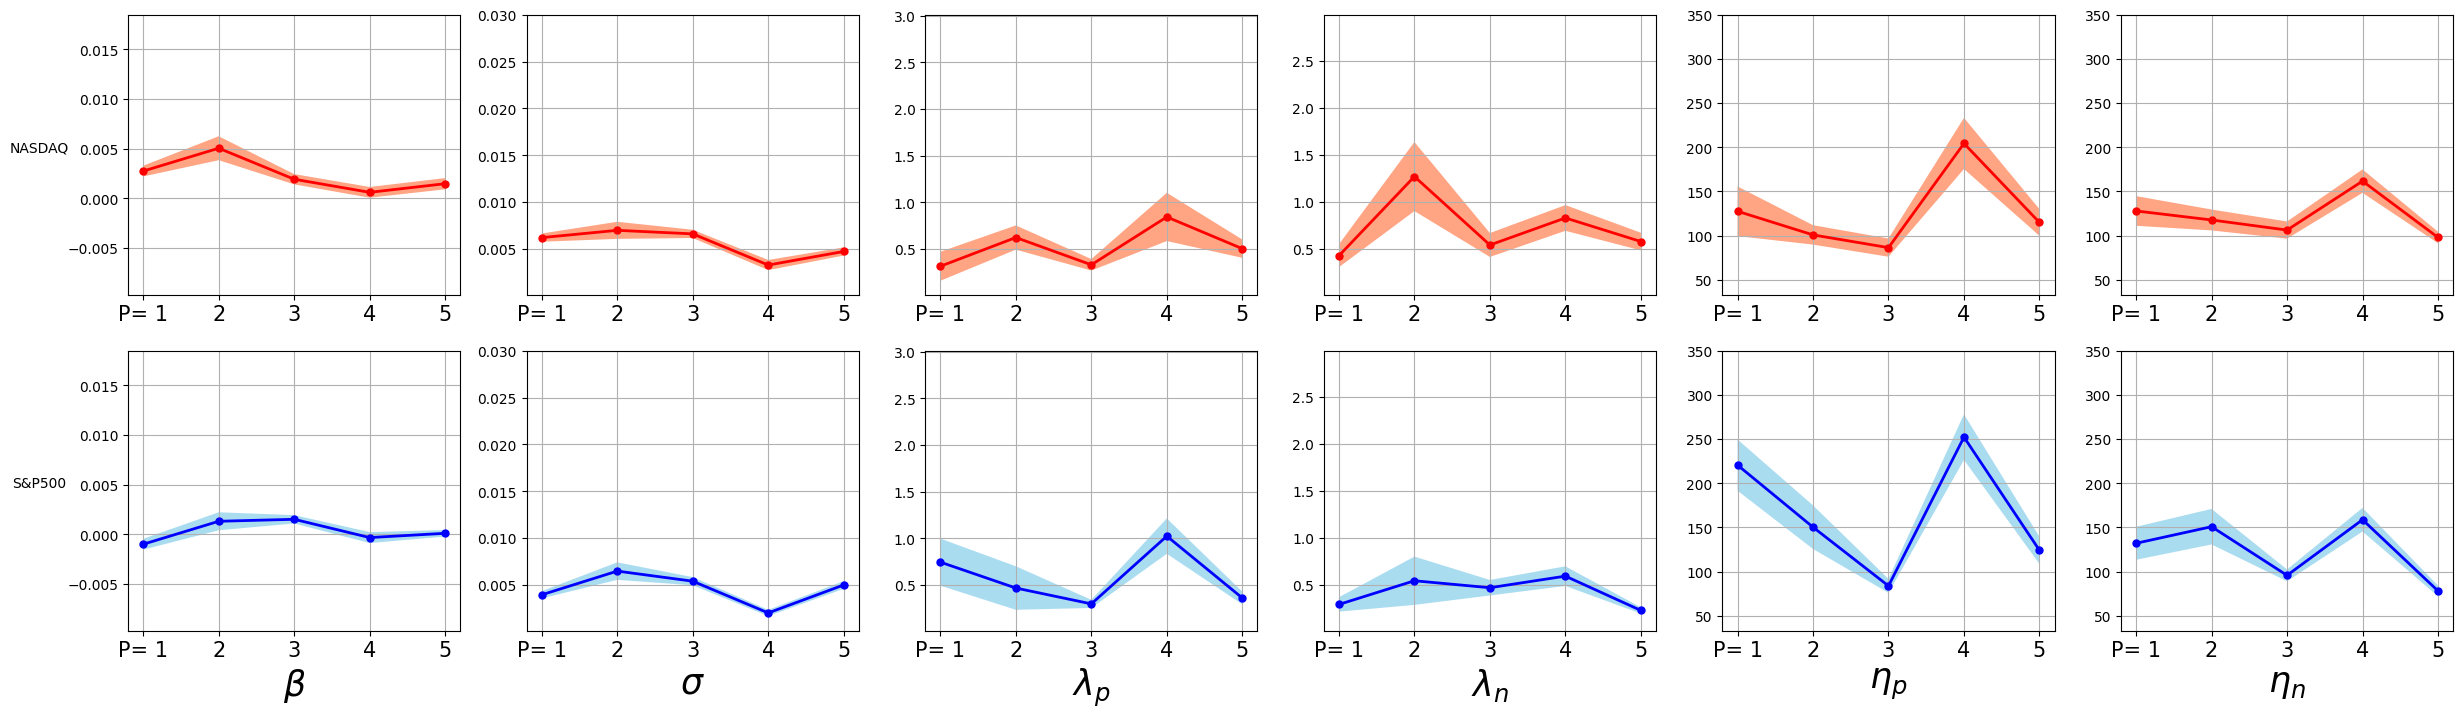

In [308]:
out_range_plot = [torch.quantile(output,.01, 0).detach().cpu().numpy(), torch.quantile(output,.95, 0).detach().cpu().numpy()]

output_range = []
for i in range(output.size()[1]):
    if i in exp_ind:
        output_range.append(np.exp(np.array(out_range_plot)[:,i]))
    elif i in exp_ind_n:
        output_range.append(np.array([np.sort(np.exp(-np.array(out_range_plot)[:,i]))[0],350]))
    else:
        output_range.append(np.array(out_range_plot)[:,i])


#output_range = torch.quantile(output.detach().cpu(),torch.tensor([.01, .99]), 0).detach().cpu().numpy()
fig, axs = plt.subplots(2, results_qqq.size()[1])
param_name = [r'$\beta$', r'$\sigma$', r'$\lambda_p$', r'$\lambda_n$', r'$\eta_p$', r'$\eta_n$']
stock_name = ["NASDAQ", "S&P500"]
stock_color = ["red", "blue"]
stock_color_shade = ["coral", "skyblue"]


fig.set_figwidth(30)
fig.set_figheight(8)


nums = []
nums_ticks = []
for j in range(1, len(data_list_qqq)+ 1 ):
    nums.append(j)
    if j ==1:
        nums_ticks.append("P= 1")
    else:
        nums_ticks.append(str(j))

esti_results = [results_qqq, results_spy]        

for i in range(len(stock_name)):
    for j in range(results_qqq.size()[1]): # Scenarios
        axs[i, j].grid()
        #axs[0, j].set_xlabel(esti_name[j], fontsize=20)
        axs[i, j].set_xticks(nums, nums_ticks, fontsize = 15)
        axs[i, j].set_ylim(output_range[j])
        axs[i, 0].set_ylabel(stock_name[i], rotation=0, labelpad=20)
        #axs[i, j].plot(nums, esti_results[i][:,j], marker = 'o', markersize =5, color = stock_color[i], linewidth=2)
        axs[i, j].plot(nums, np.array(Bayes_conf_mod[i])[:,j], marker = 'o', markersize =5, color = stock_color[i], linewidth=2)
        
        lower = np.array(Bayes_conf_mod[i])[:,j] - np.array(Bayes_conf_mad[i])[:,j]
        upper = np.array(Bayes_conf_mod[i])[:,j] + np.array(Bayes_conf_mad[i])[:,j]
    
        axs[i, j].fill_between(nums, lower, upper, where = upper >lower, facecolor =stock_color_shade[i], alpha = 0.7)
        axs[1, j].set_xlabel(param_name[j], fontsize=25)
    
plt.savefig("../JD_plots/RDA.pdf", bbox_inches='tight') 

In [309]:
torch.set_printoptions(precision=6)
print("NASDAQ")
print(np.array(Bayes_conf_mod[0])[:,0:2])
print(np.array(Bayes_conf_mod[0])[:,2:4])
print(np.array(Bayes_conf_mod[0])[:,4:6])

NASDAQ
[[0.00275 0.00619]
 [0.00505 0.00697]
 [0.00193 0.00659]
 [0.00061 0.00326]
 [0.00148 0.00471]]
[[0.31374 0.42472]
 [0.62174 1.269  ]
 [0.32946 0.53911]
 [0.84214 0.8276 ]
 [0.50219 0.57594]]
[[127.63538 127.9713 ]
 [100.91565 117.75843]
 [ 86.52517 106.34289]
 [204.33384 161.70488]
 [114.98351  97.97534]]


In [310]:
print("NASDAQ")
for i in range(5):
    for j in range(6):
        print("P"+str(i+1), "param: "+param_name[j], "mod: ", np.array(Bayes_conf_mod[0])[i,j], "sd: ", np.array(Bayes_conf_mad[0])[i,j])
    print("==================================================================")

NASDAQ
P1 param: $\beta$ mod:  0.00275 sd:  0.0005394247
P1 param: $\sigma$ mod:  0.00619 sd:  0.00043875538
P1 param: $\lambda_p$ mod:  0.31374 sd:  0.15524022
P1 param: $\lambda_n$ mod:  0.42472 sd:  0.121942684
P1 param: $\eta_p$ mod:  127.63538 sd:  28.068382
P1 param: $\eta_n$ mod:  127.9713 sd:  16.768478
P2 param: $\beta$ mod:  0.00505 sd:  0.0012048716
P2 param: $\sigma$ mod:  0.00697 sd:  0.0009123017
P2 param: $\lambda_p$ mod:  0.62174 sd:  0.12964427
P2 param: $\lambda_n$ mod:  1.269 sd:  0.36812305
P2 param: $\eta_p$ mod:  100.91565 sd:  10.976971
P2 param: $\eta_n$ mod:  117.75843 sd:  11.817848
P3 param: $\beta$ mod:  0.00193 sd:  0.00051686575
P3 param: $\sigma$ mod:  0.00659 sd:  0.0004411016
P3 param: $\lambda_p$ mod:  0.32946 sd:  0.061711222
P3 param: $\lambda_n$ mod:  0.53911 sd:  0.1272724
P3 param: $\eta_p$ mod:  86.52517 sd:  10.301228
P3 param: $\eta_n$ mod:  106.34289 sd:  9.717365
P4 param: $\beta$ mod:  0.00061 sd:  0.0005392835
P4 param: $\sigma$ mod:  0.003

In [311]:
print("S&P500")
for i in range(5):
    for j in range(6):
        print("P"+str(i+1), "param: "+param_name[j], "mod: ", np.array(Bayes_conf_mod[1])[i,j], "sd: ", np.array(Bayes_conf_mad[1])[i,j])
    print("==================================================================")

S&P500
P1 param: $\beta$ mod:  -0.00099 sd:  0.00054396933
P1 param: $\sigma$ mod:  0.00393 sd:  0.00038706197
P1 param: $\lambda_p$ mod:  0.74371 sd:  0.25234735
P1 param: $\lambda_n$ mod:  0.28913 sd:  0.076952785
P1 param: $\eta_p$ mod:  220.5867 sd:  28.98774
P1 param: $\eta_n$ mod:  132.10405 sd:  18.647087
P2 param: $\beta$ mod:  0.00132 sd:  0.00090693997
P2 param: $\sigma$ mod:  0.00646 sd:  0.00093576335
P2 param: $\lambda_p$ mod:  0.46628 sd:  0.23319009
P2 param: $\lambda_n$ mod:  0.54184 sd:  0.25755745
P2 param: $\eta_p$ mod:  150.38284 sd:  24.646332
P2 param: $\eta_n$ mod:  150.88132 sd:  20.091599
P3 param: $\beta$ mod:  0.00152 sd:  0.0004192384
P3 param: $\sigma$ mod:  0.00538 sd:  0.0004380853
P3 param: $\lambda_p$ mod:  0.29649 sd:  0.043831676
P3 param: $\lambda_n$ mod:  0.46747 sd:  0.08269103
P3 param: $\eta_p$ mod:  83.94413 sd:  7.897976
P3 param: $\eta_n$ mod:  95.82992 sd:  6.685585
P4 param: $\beta$ mod:  -0.00032 sd:  0.0005512384
P4 param: $\sigma$ mod:  0

In [312]:
tmp = np.array(TEJ_mod)
#print(tmp)
tmp2 = np.array(TEJ_mad)
#print(tmp2)
PN_name = ["P", "N"]
for i in range(2):
    for k in range(2):
        for j in range(5):
            if k == 0:
                print(stocks[i], "P" + str(j+1), "mod:", tmp[i,j,k], "MAD: ", tmp2[i,j,k])
            else: 
                print(stocks[i], "N" + str(j+1), "mod:", tmp[i,j,k], "MAD: ", tmp2[i,j,k])
        print("============================================")

nasdq P1 mod: 0.00252 MAD:  0.00078351225
nasdq P2 mod: 0.00582 MAD:  0.0008211916
nasdq P3 mod: 0.00364 MAD:  0.00041012792
nasdq P4 mod: 0.00389 MAD:  0.0008447154
nasdq P5 mod: 0.00442 MAD:  0.0005098549
nasdq N1 mod: 0.00343 MAD:  0.00058830087
nasdq N2 mod: 0.01125 MAD:  0.0021860893
nasdq N3 mod: 0.00545 MAD:  0.00079882424
nasdq N4 mod: 0.00478 MAD:  0.00055730226
nasdq N5 mod: 0.00588 MAD:  0.0006408866
sp500 P1 mod: 0.00345 MAD:  0.0007869471
sp500 P2 mod: 0.00342 MAD:  0.0010403432
sp500 P3 mod: 0.0035 MAD:  0.00031196442
sp500 P4 mod: 0.00387 MAD:  0.00050335226
sp500 P5 mod: 0.00279 MAD:  0.00032444368
sp500 N1 mod: 0.0021 MAD:  0.0003837013
sp500 N2 mod: 0.00375 MAD:  0.0012080497
sp500 N3 mod: 0.00473 MAD:  0.0005987801
sp500 N4 mod: 0.0035 MAD:  0.00045475224
sp500 N5 mod: 0.00291 MAD:  0.00027786673


In [313]:
tmp.shape

(2, 5, 2)